In [1]:
from __future__ import division
import numpy as np
import glob

In [2]:
data_type = 'genie'
nu_type ="NuMu"
int_type = '1'
folder = '1' 
files = '100'

n_files = 100
i3_per_npz = 10 # 10 for NuE1 and NuMu1, 100 otherwise

name = nu_type+'_'+int_type+'_'+str(folder)#+'_'+str(files)+'?_'
print(name)

N_PRIM_CHILDREN = 3 
STRINGS_TO_SAVE = 10
N_Y_BINS = 60
N_X_BINS = 500
N_CHANNELS = 3

DEFAULT_INDEX = 2.88
DEFAULT_PHI = 2.1467

outer_strings = set([1,2,3,4,5,6,7,13,14,21,22,30,31,40,41,50,51,59,60,67,68,72,73,74,75,76,77,78])

NuMu_1_1


In [3]:
def get_rates_genie(one_weights, nu_E, n_npz_files, i3_per_npz, evts_per_i3file, spectral_index=DEFAULT_INDEX, phi_0=DEFAULT_PHI):
    ''' returns the per-year weights for the given input parameters '''
    total_events = n_npz_files*i3_per_npz*evts_per_i3file
    secs_per_year = 31536000
    flux_weights = 1e-18*secs_per_year*phi_0*(nu_E/100e3)**(-spectral_index)
    return flux_weights/total_events*one_weights

In [ ]:
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
preds_dtype = np.dtype(
    [     
        ('n1', np.float32),
        #('n2_1', np.float32),
        #('n2_2', np.float32),
        ('n2', np.float32),
        ('n3', np.float32)
    ]
)
map_dtype = np.dtype(
    [
        ("id", id_dtype),
        ('raw', np.int32),
        ('st_raw', np.int32,(3)),
        ('pulses', np.int32),
        ('st_pulses', np.int32,(3)),
        ('cal', np.int32),
        ('st_cal', np.int32,(3)),
        ('hlc', np.int32),
        ('st_hlc', np.int32,(3)),
        ('slc', np.int32),
        ('st_slc', np.int32,(3))
    ]
)
st_info_dtype = np.dtype(
    [
        ('q', np.float32),
        ('num', np.uint32),
        ('dist', np.float32)
    ]
)

particle_dtype = np.dtype(
    [
        ("tree_id", np.uint32,(2)),
        ("pdg", np.int32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
veto_dtype = np.dtype(                                             
    [                                                                             
        ("SPE_rlogl", np.float32),                                                      
        ("Cascade_rlogl", np.float32),
        ("SPE_rlogl_noDC", np.float32),                                                   
        ("Cascade_rlogl_noDC", np.float32),                                              
        ("FirstHitZ", np.float32),
        ("VHESelfVetoVertexPosZ", np.float32),                                             
        ("LeastDistanceToPolygon_Veto", np.float32)
    ]
)

hese_dtype = np.dtype(                                             
    [                                                                             
        ("qtot", np.float32),
        ("vheselfveto", np.bool_),
        ("vheselfvetovertexpos", np.float32,(3)),
        ("vheselfvetovertextime", np.float32),
        ("llhratio", np.float32)
    ]
)
#if data_type =='genie':
WEIGHT_KEY = "I3MCWeightDict"
weight_dtype = np.dtype(
    [
        ('PrimaryNeutrinoAzimuth',np.float32), 
        ('TotalColumnDepthCGS',np.float32), 
        ('MaxAzimuth',np.float32), 
        ('SelectionWeight',np.float32), 
        ('InIceNeutrinoEnergy',np.float32), 
        ('PowerLawIndex',np.float32), 
        ('TotalPrimaryWeight',np.float32), 
        ('PrimaryNeutrinoZenith',np.float32), 
        ('TotalWeight',np.float32), 
        ('PropagationWeight',np.float32), 
        ('NInIceNus',np.float32), 
        ('TrueActiveLengthBefore',np.float32), 
        ('TypeWeight',np.float32), 
        ('PrimaryNeutrinoType',np.float32), 
        ('RangeInMeter',np.float32), 
        ('BjorkenY',np.float32), 
        ('MinZenith',np.float32), 
        ('InIceNeutrinoType',np.float32), 
        ('CylinderRadius',np.float32), 
        ('BjorkenX',np.float32), 
        ('InteractionPositionWeight',np.float32), 
        ('RangeInMWE',np.float32), 
        ('InteractionColumnDepthCGS',np.float32), 
        ('CylinderHeight',np.float32), 
        ('MinAzimuth',np.float32), 
        ('TotalXsectionCGS',np.float32), 
        ('OneWeightPerType',np.float32), 
        ('ImpactParam',np.float32), 
        ('InteractionType',np.float32), 
        ('TrueActiveLengthAfter',np.float32), 
        ('MaxZenith',np.float32), 
        ('InteractionXsectionCGS',np.float32), 
        ('PrimaryNeutrinoEnergy',np.float32), 
        ('DirectionWeight',np.float32), 
        ('InjectionAreaCGS',np.float32), 
        ('MinEnergyLog',np.float32), 
        ('SolidAngle',np.float32), 
        ('LengthInVolume',np.float32), 
        ('NEvents',np.uint32), 
        ('OneWeight',np.float32), 
        ('MaxEnergyLog',np.float32), 
        ('InteractionWeight',np.float32), 
        ('EnergyLost',np.float32)
    ]
)

info_new_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("image", np.float32, (N_X_BINS, N_Y_BINS, N_CHANNELS)),
        ("wf_times",np.float32,(N_Y_BINS, N_CHANNELS)),
        ("wf_pos",np.float32,(3, N_Y_BINS, N_CHANNELS)),
        ("wf_width",np.float32),
        ("qtot", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4)),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("map", map_dtype),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("trck_reco", particle_dtype),
        ("cscd_reco", particle_dtype),
        ("logan_veto", veto_dtype),
        ("hese_old", hese_dtype),
        ("hese", hese_dtype),
        ("llhcut",np.float32),
        ("weight", weight_dtype),
        ("weight_val",np.float32)

    ]
)
info_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("image", np.float32, (N_X_BINS, N_Y_BINS, N_CHANNELS)),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(3)),
        ("primary_child_pdg", np.float32,(3)),
        ("logan_veto", veto_dtype),
        ("hese_old", hese_dtype),
        ("hese", hese_dtype),
        ("weight", weight_dtype),     
    ]
)
save_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("preds", preds_dtype),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("logan_veto", veto_dtype),
        ("hese", hese_dtype),
        ("weight", weight_dtype),
        ("weight_val",np.float32)
    ]
)

save_new_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("preds", preds_dtype),
        ("wf_times",np.float32,(N_Y_BINS, N_CHANNELS)),
        ("wf_pos",np.float32,(3, N_Y_BINS, N_CHANNELS)),
        ("wf_width",np.float32),
        ("qtot", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4)),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("map", map_dtype),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("trck_reco", particle_dtype),
        ("cscd_reco", particle_dtype),
        ("logan_veto", veto_dtype),
        ("hese_old", hese_dtype),
        ("hese", hese_dtype),
        ("llhcut",np.float32),
        ("weight", weight_dtype),
        ("weight_val",np.float32)

    ]
)


In [5]:
# size = 0
# for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
#     x = np.load(file_name, mmap_mode="r")['arr_0']
#     for e in x:
#         if (e['qst']['q'][0][0] >= 2000):
#             size = size +1
#     print(file_name, len(x))
# print(size)

In [ ]:
size = 0
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'_*.npz'):
#for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/tau_causality/*_data.npz'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, len(x))
    size = size +len(x)
print(size)

In [3]:
import tensorflow as tf
import os

# Set which GPU to use.  This probably needs to be done before any other CUDA vars get defined.
# Use the command "nvidia-smi" to get association of a particular GPU with a particular number.
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1,2,3,4"
from tensorflow.keras.models import load_model
model_1 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_200k_Qst_2000_2/vgg16_200k_QSt2000_dataset_norm_2.h5')
model_2_1 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_30k_Qst_2000_Corsika/vgg16_30k_QSt2000_corsika.h5')
model_2_2 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_30k_Qst_2000_Corsika_2/vgg16_30k_QSt2000_corsika_2.h5')
model_2_3 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_30k_Qst_2000_Corsika_3/vgg16_30k_QSt2000_corsika_3.h5')
model_3 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_700k_Qst_2000_MuvsTau_3/vgg16_700k_QSt2000_dataset_norm_MuVsTau_3.h5')

mean_1 = 0.0012322452384978533 
std_1  = 0.009694634936749935
mean_2 = 0.0002565285249147564
std_2  = 0.005851939786225557
mean_3 = 0.00036459346301853657
std_3  = 0.007035365793853998

In [13]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_CC_'+name+'.npy', mode = 'w+', dtype =save_dtype, shape=(size,))
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    y = np.zeros(x.shape[0],dtype = save_dtype)
    im = (x['image']-mean_1)/std_1
    pred_n1 = model_1.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_2)/std_2
    pred_n2_1 = model_2_1.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2_2 = model_2_2.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2_3 = model_2_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    for n,e in enumerate(x):
        #print(e.dtype)
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2_1','n2_2','n2_3','n3']] = (pred_n1[n],pred_n2_1[n],pred_n2_2[n],pred_n2_3[n],pred_n3[n])
        weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
                                 n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
        y[["id","preds","weight_val","qtot","qst","qst_all","primary","prim_daughter","logan_veto","hese_old","hese","weight"]][n]=\
        (e['id'],preds,weight_val,e['qtot'],e['qst'],e['qst_all'],e['primary'],e['prim_daughter'],e['logan_veto'],e['hese_old'],e['hese'],e['weight'])
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)

NuMu_1_1
#.npz files =  100


ValueError: could not broadcast input array from shape (4754) into shape (2491)

In [9]:
data0= np.load('/fastio2/dasha/double_pulse/data_CC_'+name+'.npy', mmap_mode='r')
print(data0.shape, data0[0])

(420185,) ((11020, 4294967295, 0, 0), (0.5029624, 0.9999963, 0.9999962, 1., 0.8313336), 112445.42, [(37266.85 , 83,    0.    ), (24574.875, 80, 1703.8492), (18629.074, 84, 5164.3823)], [(37266.85 , 83,     0.    ), (24574.875, 80,  1703.8492), (18629.074, 84,  5164.3823), (12614.425, 27,  5148.5767), ( 6314.325, 79,  6869.4155), ( 4325.85 , 36,  5130.4585), ( 1854.575, 85, 15459.179 ), ( 1825.25 , 82,  7705.8164), ( 1205.675, 37,  7458.524 ), ( 1067.025, 81, 14333.451 )], ([2446240659,         49], 12, 227807.52, [ -79.94912,  -35.38836, 1947.9994 ], [0.10451031, 2.8623977 ], 3701.7664, 1811.1609), ([2446240659,         50], 11, 175495.16, [101.67525 , -87.456985, 146.72066 ], [0.10447983, 2.8619869 ], 9743.148, 0.), (7.4528465, 7.0473814, 7.6938033, 7.1813607, 136.26, 141.21361, 356.51886), (19635.35, False, [113.19   , -60.47   , 141.21361], 9892., -123.10705), (19635.35, False, [113.19   , -60.47   , 141.21361], 9892., -123.10705), (2.8623977, 191354.53, 6.2831855, 1., 227807.52, 1.

In [8]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_tau_causality_'+name2+'.npy', mode = 'w+', dtype =save_4_dtype, shape=(size,))
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/tau_causality/*_data.npz'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    #print(file_name, x.shape)
    y = np.zeros(x.shape[0],dtype = save_4_dtype)    
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_4)/std_4
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
   
    for n,e in enumerate(x): 
        sumd = [-1,-1,-1]
        max_dom = [-1,-1,-1]
        cw_dom = [-1.0,-1.0,-1.0]
        sumd[0] =[np.sum(e['image'][0,:,i,0]) for i in range(60)]
        sumd[1] =[np.sum(e['image'][0,:,i,1]) for i in range(60)]
        sumd[2] =[np.sum(e['image'][0,:,i,2]) for i in range(60)]
        max_dom[0] = np.argmax(sumd[0])
        max_dom[1] = np.argmax(sumd[1])
        max_dom[2] = np.argmax(sumd[2])
        cw_dom[0] = np.average(range(1,61),weights = sumd[0])
        cw_dom[1] = np.average(range(1,61),weights = sumd[1])
        cw_dom[2] = np.average(range(1,61),weights = sumd[2])
        
        sumt = [-1,-1,-1]
        max_time = [-1,-1,-1]
        cw_time = [-1.0,-1.0,-1.0]
        sumt[0] =[np.sum(e['image'][0,i,:,0]) for i in range(500)]
        sumt[1] =[np.sum(e['image'][0,i,:,1]) for i in range(500)]
        sumt[2] =[np.sum(e['image'][0,i,:,2]) for i in range(500)]
        max_time[0] = np.argmax(sumt[0])
        max_time[1] = np.argmax(sumt[1])
        max_time[2] = np.argmax(sumt[2])
        cw_time[0] = np.average(range(1,501), weights = sumt[0])
        cw_time[1] = np.average(range(1,501), weights = sumt[1])
        cw_time[2] = np.average(range(1,501), weights = sumt[2])
        
        #print(cw_dom)
        #print(cw_time)
        #print(max_dom)
        #print(max_time)
        
        im_sum = [-1,-1,-1]
        im_sum[0] = np.sum(e['image'][0,:,:,0])
        im_sum[1] = np.sum(e['image'][0,:,:,1])
        im_sum[2] = np.sum(e['image'][0,:,:,2])
        #print( e['qst']['num'][0])
        
        top_st = int(e['qst']['num'][0][0] in outer_strings)
        top3_st = sum([1 for i in e['qst']['num'][0] if i in outer_strings])
        top10_st = sum([1 for i in e['qst_all']['num'][0] if i in outer_strings])
        #print(top_st,top3_st,top10_st)
              
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2','n3','n4']] = (pred_n1[n],pred_n2[n],pred_n3[n],pred_n4[n])
        weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
                                 n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
        
        y[["id","max_dom","cw_dom","max_time","cw_time","im_sum","preds","weight_val","qtot","qst","qst_all","moi","ti","map","primary",\
           "llhcut","prim_daughter","trck_reco","cscd_reco","logan_veto","hese_old","hese","wf_times","wf_pos","wf_width","weight","weight_it"]][n]\
        =(e['id'], max_dom, cw_dom, max_time, cw_time, im_sum, preds, weight_val,e['qtot'],e['qst'],e['qst_all'],e["moi"],e["ti"],e["map"],e['primary'],\
          e["llhcut"],e['prim_daughter'],e['trck_reco'],e['cscd_reco'],e['logan_veto'],e['hese_old'],e['hese'],e['wf_times'],e['wf_pos'],e['wf_width'],e['weight'],e['weight_val'])
        #print(y["weight_val"][n]) 
        #print(y["cw_dom"][n])
        #print(y["max_time"][n])
        #print(y["cw_time"][n])
        #print(y["wf_time"][n])
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)    


NuTau_1_1_
#.npz files =  100
5327.8112449646


In [16]:
from tqdm import tqdm

In [ ]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_hese_test_2'+name2+'.npy', mode = 'w+', dtype =save_dtype, shape=(size,))
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/nutau_hese_test/Images_HESE_*_data.npz'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    y = np.zeros(x.shape[0],dtype = save_dtype)
    print(file_name, x.shape)
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_4)/std_4
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)

    for n,e in enumerate(x):       
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2','n3','n4']] = (pred_n1[n],pred_n2[n],pred_n3[n],pred_n4[n])
        weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
                                 n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
        y[["id","preds","qtot","cog","moi","ti","qst","qst_all", "map", "primary","prim_daughter","logan_veto","hese_old","hese3", "hese4",\
           "hese5","hese6","hese7", "hese8","hese9","hese10","hese11","hese12","llhcut","weight","weight_it",'weight_val']][n]=\
        (e["id"],preds,e["qtot"],e["cog"],e["moi"],e["ti"],e["qst"],e["qst_all"], e["map"], e["primary"],\
         e["prim_daughter"],e["logan_veto"],e["hese_old"],e["hese3"], e["hese4"],e["hese5"],e["hese6"],\
         e["hese7"], e["hese8"],e["hese9"],e["hese10"],e["hese11"],e["hese12"],e["llhcut"],e["weight"],e["weight_val"], weight_val)
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    #print(y['out_st'])
    print(data[pos:pos+len(x)].shape,y.shape,pos,len(x))
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)


NuMu_1_1
#.npz files =  100
/home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_10_10_data.npz (4629, 1)
129.2918450832367


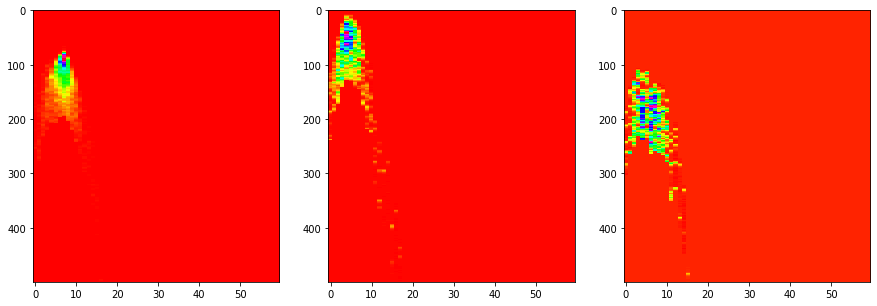

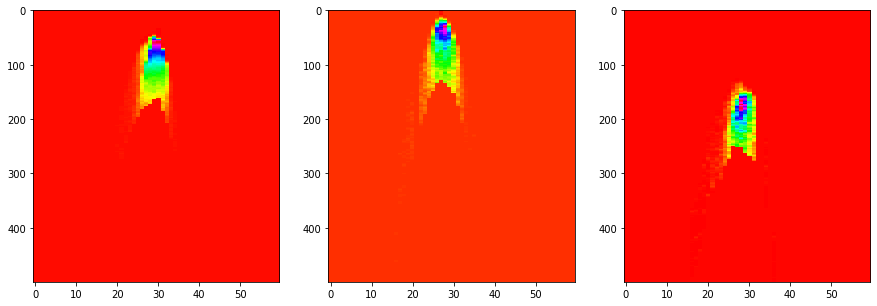

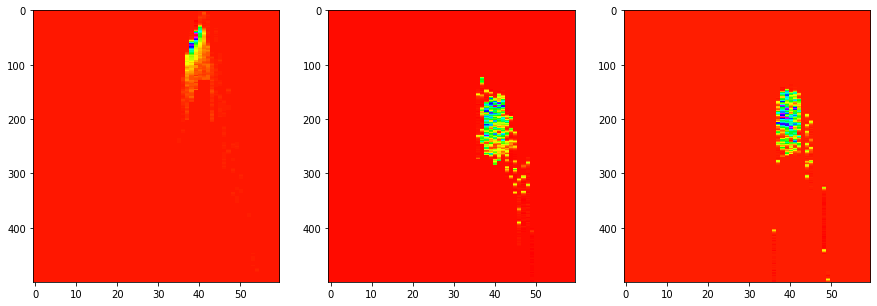

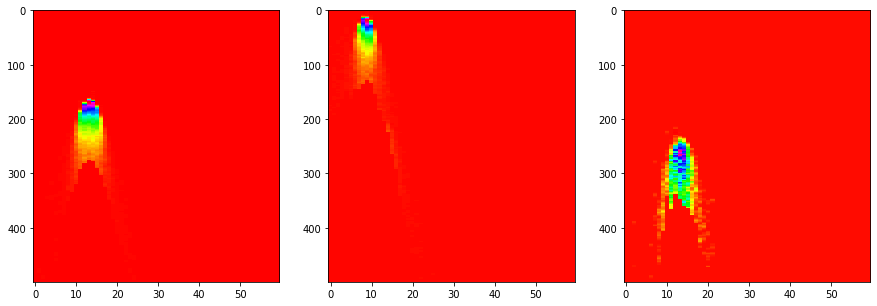

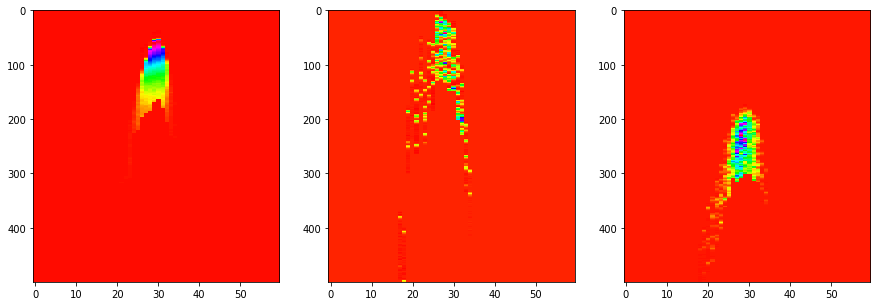

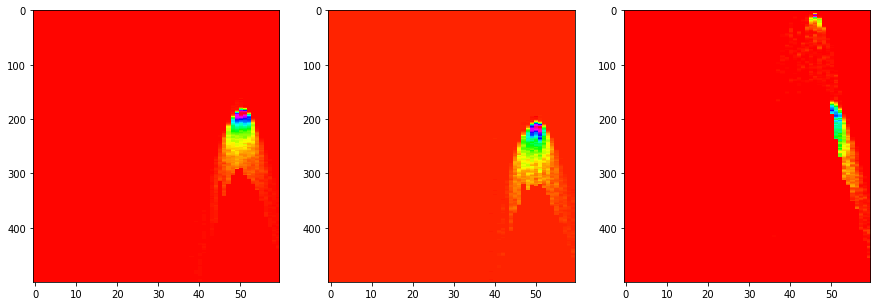

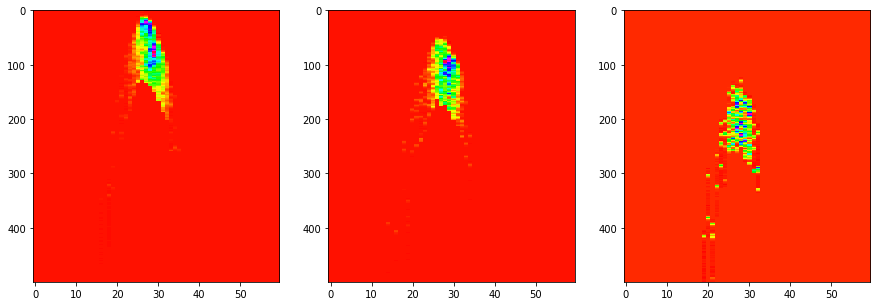

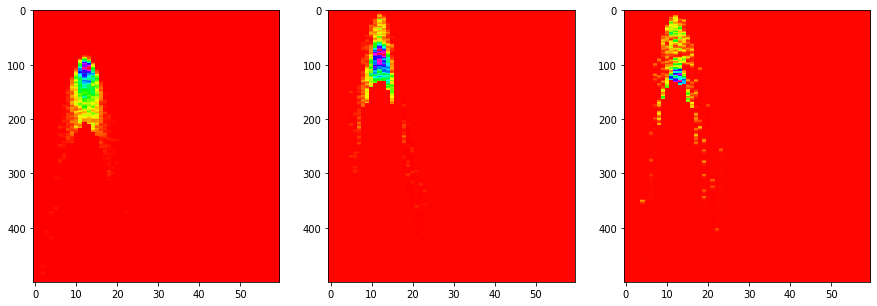

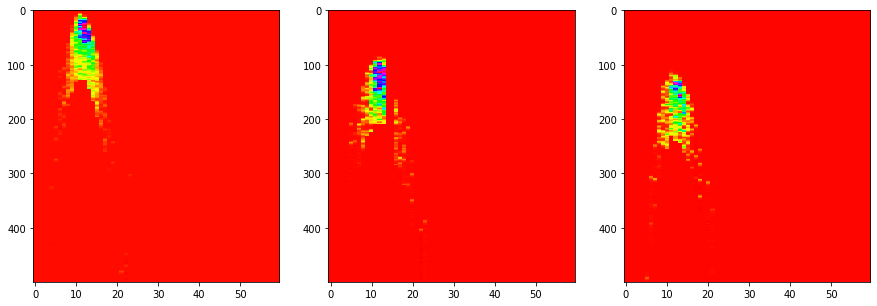

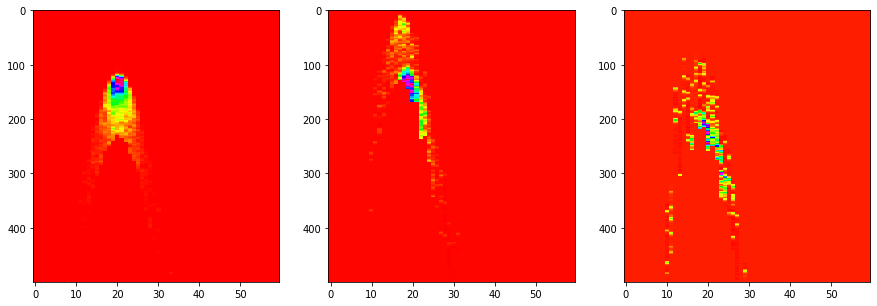

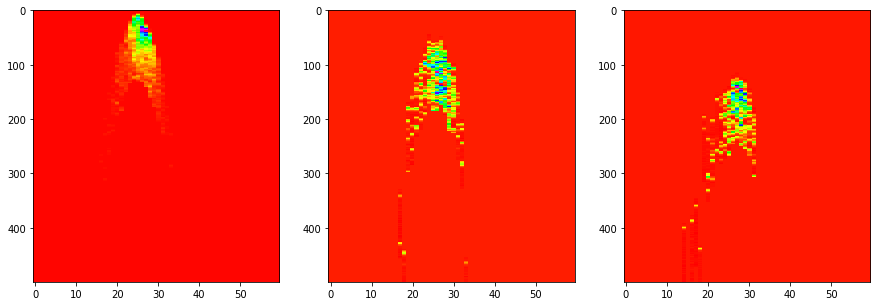

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
pos = 0
print(name)
start = time.time()
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*')[:1]:
    if pos >50:
        break
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    im = (x['image']-mean_1)/std_1
    pred_n1 = model_1.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =100)
    im = (x['image']-mean_2)/std_2
    pred_n2_1 = model_2_1.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =100)
    pred_n2_2 = model_2_2.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =100)
    pred_n2_3 = model_2_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =100)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =100)
    cut1=0.99
    cut2=0.8
    for n,e in enumerate(x):
        if pos >100:
            break
        #print(e['qst']['q'][0],e['qst']['q'][0].shape)
        ch = (pred_n1[n] >cut1) and (pred_n3[n] > cut2) and (e['qst']['q'][0][0]>2000)
        #print(pos)
        if ch:
            pos = pos +1
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(131)
            ax1.imshow(e['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'hsv')
            ax2 = fig.add_subplot(132)
            ax2.imshow(e['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'hsv')
            ax3 = fig.add_subplot(133)
            ax3.imshow(e['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'hsv')
end = time.time()
print(end - start)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
pos = 0
print(name)
start = time.time()
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    if pos >30:
        break
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    #im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #im = (x['image']-mean_3)/std_3
    #pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #cut1=0.56
    #cut2=0.6
    for n,e in enumerate(x):
        if pos >30:
            break
        #ch = (cut1 <= pred_n1[n]) and (pred_n1[n] <= cut2) and (cut1 <= pred_n1[n]) and (pred_n4[n] <= cut2)
        #print(pos)
        #print(np.sum(e['image'][0,:,:,0]))
        if np.sum(e['image'][0,:,:,0])==0:
            print(e['qst'],e['qtot'],e['primary']['position'])
            pos = pos +1
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(131)
            ax1.imshow(e['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'hsv')
            ax2 = fig.add_subplot(132)
            ax2.imshow(e['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'hsv')
            ax3 = fig.add_subplot(133)
            ax3.imshow(e['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'hsv')
end = time.time()
print(end - start)

In [15]:
# pos = 0
# print(name)
# start = time.time()
# print("hello")
# start = time.time()
# data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_'+name2+'.npy', mode = 'w+', dtype =save_dtype, shape=(size,))
# print('#.npz files = ',n_files)
# for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
#     x = np.load(file_name, mmap_mode="r")['arr_0']
#  #   print(x.dtype)
#     print(file_name, x.shape)
#     y = np.zeros(x.shape[0],dtype = save_dtype)    
#      #Get_preds    
#     for n,e in enumerate(x):    #mean = np.mean(im)
#         im = (e['image']-mean)/std
#         pred_n1 = model.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
#         pred_n2 = model_m.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
#         im = (e['image']-mean_3)/std_3
#         pred_n3 = model_3.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
#         #im = (e['image']-mean_4)/std_4
#         pred_n4 = model_4.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
        
#         #print(pred_mc[0], pred_mc.dtype)
#         preds = np.zeros(1,dtype = preds_dtype)    
#         preds[['n1','n2','n3','n4']] = (pred_n1,pred_n2,pred_n3,pred_n4)
#         weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
#                                  n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
#         y[["id","preds","weight_val","qtot","qst","qst_all","primary","prim_daughter","primary_child_energy","primary_child_pdg",\
#            "logan_veto","hese_old","hese","weight"]][n]=(e['id'],preds,weight_val,e['qtot'],e['qst'],e['qst_all'],e['primary'],\
#                                                          e['prim_daughter'],e['primary_child_energy'],e['primary_child_pdg'],\
#                                                          e['logan_veto'],e['hese_old'],e['hese'],e['weight'])
#        # print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    
    
#     data[pos:pos+len(x)] = y
#     pos = pos + len(x)
    
# end = time.time()
# print(end - start)

NuE_3_1_1
hello
#.npz files =  1
/home/dup193/work/double_pulse/data/images_3str/Images_NuE_3_1_1_data.npz (420, 1)
105.5365993976593


In [ ]:
save_3_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("dom", np.uint32),
        ("im_sum", np.float32,(3)),
        ("out_st", np.uint32,(3)),
        ("preds", preds_dtype),                
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("qoth", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4)),
        ("wf_times", np.float,(180,3)),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("map", map_dtype),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("logan_veto", veto_dtype),
        ("hese", hese_dtype),
        ("weight", weight_dtype)

    ]
)
save_2_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("dom", np.uint32),
        ("im_sum", np.float32,(3)),
        ("out_st", np.uint32,(3)),
        ("preds", preds_dtype),
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),                                                                                                    
        ("weight", weight_dtype)
    ]
)
save_4_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("preds", preds_dtype),
        ("max_dom", np.uint32, (3)),
        ("cw_dom", np.float32, (3)),
        ("max_time", np.uint32, (3)),
        ("cw_time", np.float32, (3)),
        ("im_sum", np.float32,(3)),
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4)),
        ("map", map_dtype),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("trck_reco", particle_dtype),
        ("cscd_reco", particle_dtype),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),
        ("llhcut",np.float32),
        ("wf_times",np.float32,(N_Y_BINS, N_CHANNELS)),
        ("wf_pos",np.float32,(3, N_Y_BINS, N_CHANNELS)),
        ("wf_width",np.float32),
        ("weight", weight_dtype),
        ("weight_it", np.float32)
    ]
)